In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
dat = pd.read_csv('./winequality-red.csv')
dat.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
dat.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [4]:
dat.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Plots

In [5]:
def draw_plot(dataset, rows, cols, plot_type):
    col_names = dataset.columns.values
    n_of_column = len(col_names)
    
    fig, axarr = plt.subplots(rows, cols, figsize = (22,16))

    counter = 0 
    for i in range(rows):
        for j in range(cols):
            if 'box' in plot_type:
                sns.boxplot (x = 'quality', y = col_names[counter], data = dataset, ax = axarr[i][j])
            elif 'point' in plot_type:
                sns.pointplot (x = 'quality', y = col_names[counter], data = dataset, ax = axarr[i][j])
            elif 'bar' in plot_type:
                sns.barplot (x = 'quality', y = col_names[counter], data = dataset, ax = axarr[i][j])
                
            counter += 1
            if counter == (n_of_column-1,):
                break

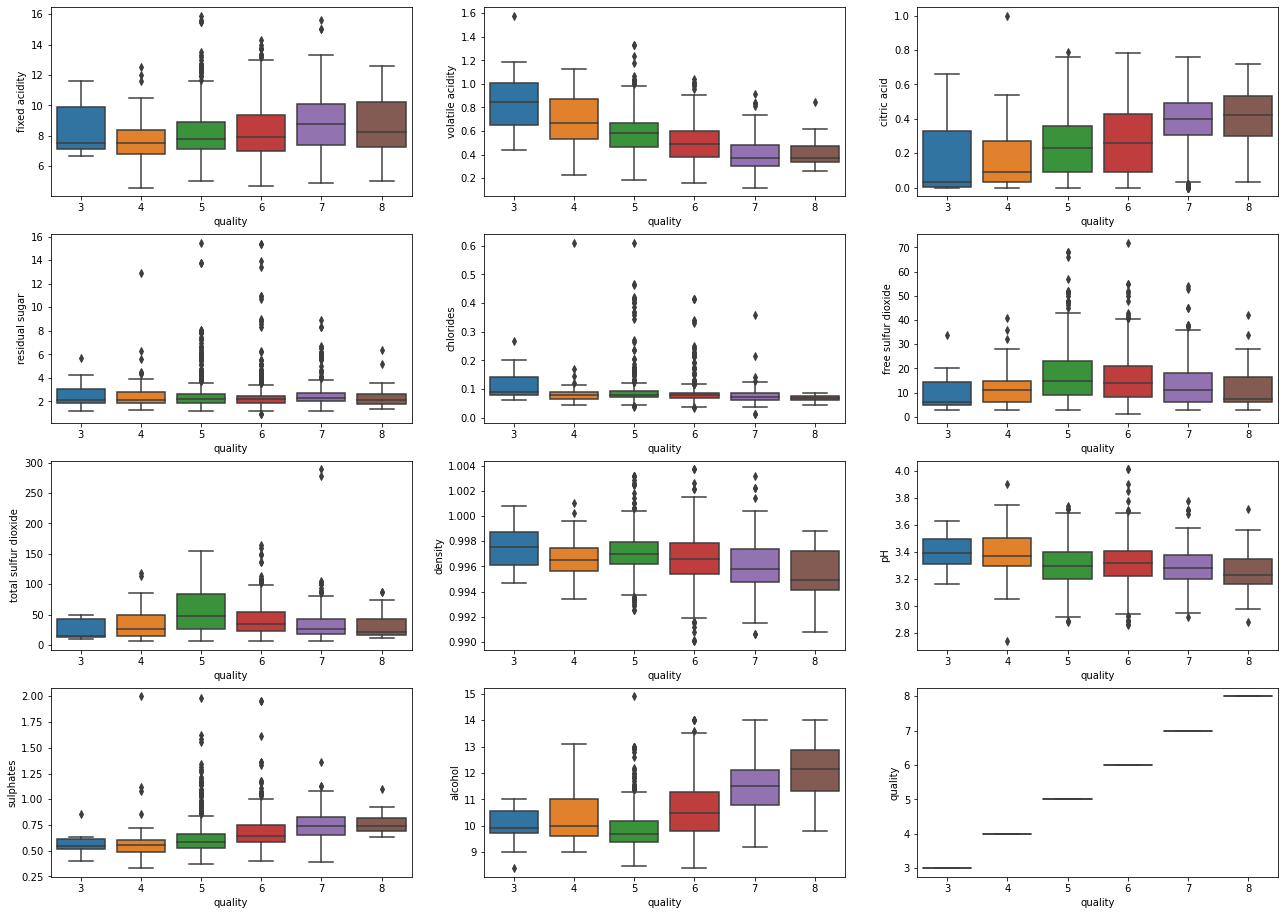

In [6]:
draw_plot(dat,4,3,"box")

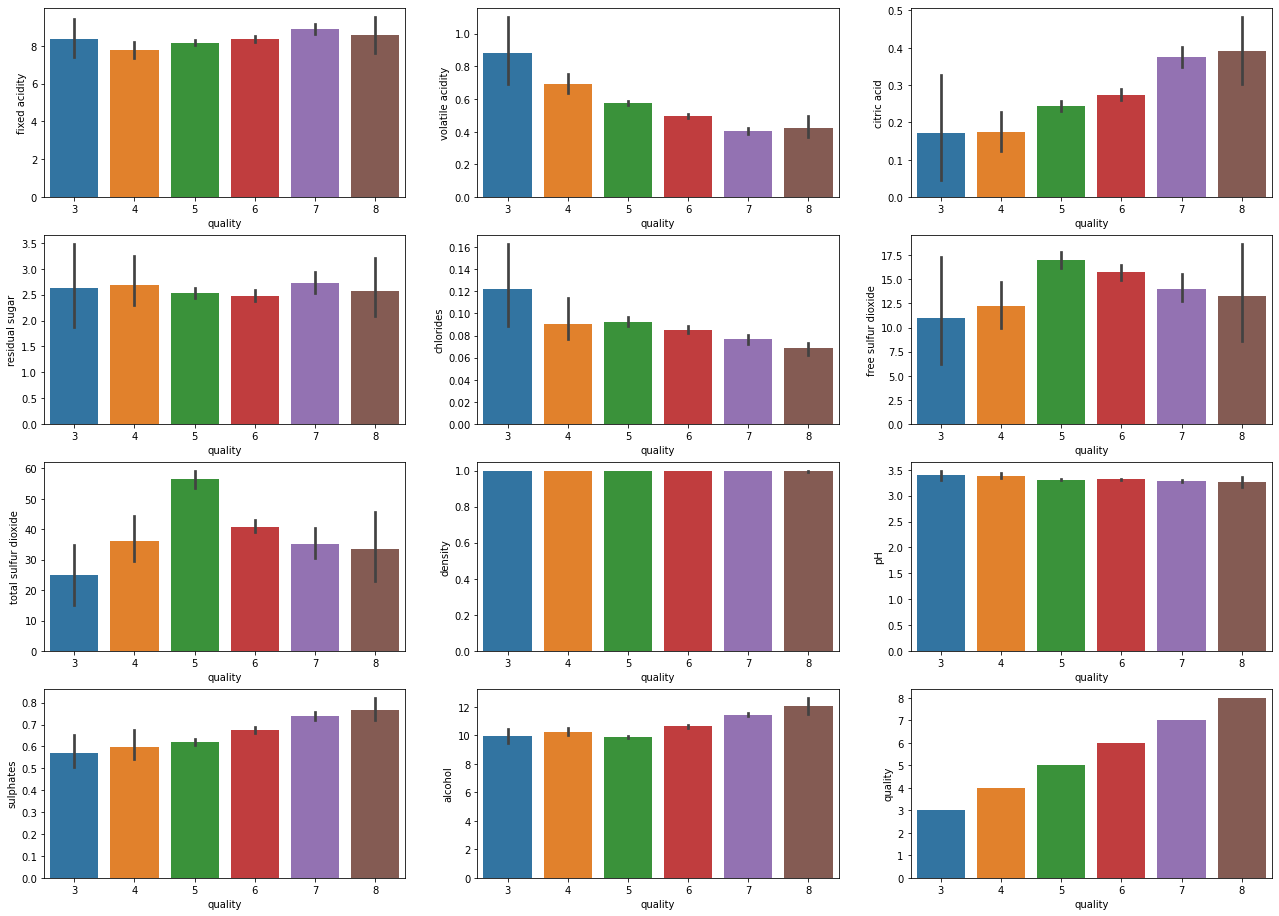

In [7]:
draw_plot(dat,4,3,"bar")

In [8]:
dat.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

## Splitting the data

In [9]:
from sklearn.model_selection import train_test_split

X=dat.drop('quality', axis=1)
y=dat['quality']

X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

## Cross-validation(1st time)

In [10]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def get_models():
    models=[]
    models.append(("LR", LogisticRegression()))
    models.append(("NB", GaussianNB()))
    models.append(("DT", DecisionTreeClassifier()))
    models.append(("KNN", KNeighborsClassifier()))
    models.append(("SVM rbf",SVC()))
    models.append(("SVM linear",SVC(kernel='linear')))
    models.append(("RF", RandomForestClassifier()))
    return models

def cross_validation_scores_of_models(X, y):
    sc = StandardScaler()
    models=get_models()

    results=[]
    names= []
    
    for name, model in models:
        kfold=StratifiedKFold(n_splits=5, shuffle=True,random_state=22)
        pipeline = Pipeline([('transformer', sc), ('estimator', model)])
        cv_result=cross_val_score(pipeline, X, y, cv=kfold, scoring="accuracy")
        names.append(name)
        results.append(cv_result)
        print("%s has a cross-validation mean accuracy of %.3f +/- %.3f" % (name, cv_result.mean(), cv_result.std()))

In [11]:
cross_validation_scores_of_models(X_train, y_train)

LR has a cross-validation mean accuracy of 0.593 +/- 0.019
NB has a cross-validation mean accuracy of 0.542 +/- 0.029
DT has a cross-validation mean accuracy of 0.572 +/- 0.023
KNN has a cross-validation mean accuracy of 0.560 +/- 0.021
SVM rbf has a cross-validation mean accuracy of 0.615 +/- 0.043
SVM linear has a cross-validation mean accuracy of 0.586 +/- 0.016
RF has a cross-validation mean accuracy of 0.659 +/- 0.027


The predicted accuracies are very low. So, I'm dividing the categories of quality such that 2-7 are 'Bad' and 7-8 are 'Good', as suggested in the Kaggle data description.

In [12]:
bins = (2, 6.5, 8)
labels = ['bad', 'good']
dat['quality'] = pd.cut(x = dat['quality'], bins = bins, labels = labels)

In [13]:
dat.quality.value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
dat['quality'] = labelencoder.fit_transform(dat['quality'])

## Splitting the data on the new dataset

In [15]:
X=dat.drop('quality', axis=1)
y=dat['quality']

X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

## Cross-validation(2nd time)

In [16]:
cross_validation_scores_of_models(X_train, y_train)

LR has a cross-validation mean accuracy of 0.878 +/- 0.011
NB has a cross-validation mean accuracy of 0.831 +/- 0.014
DT has a cross-validation mean accuracy of 0.838 +/- 0.014
KNN has a cross-validation mean accuracy of 0.862 +/- 0.011
SVM rbf has a cross-validation mean accuracy of 0.878 +/- 0.009
SVM linear has a cross-validation mean accuracy of 0.864 +/- 0.002
RF has a cross-validation mean accuracy of 0.885 +/- 0.017


## Correlation

<AxesSubplot:>

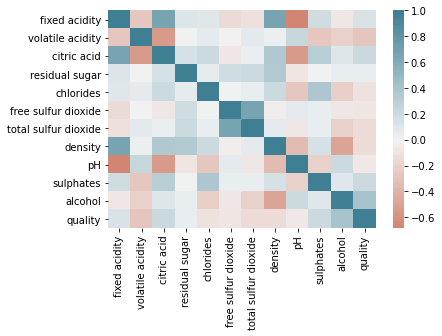

In [17]:
corr = dat.corr()
sns.heatmap(corr,center = 0, cmap=sns.diverging_palette(20, 220, n=200))

### Inferences

The quality of wine is highly correlated to volatile acidity and alcohol.

pH and citric acid/fixed acidity are highly inversely correlated as all of us know that the higher the level of acidity, the lower the pH level.

# Model Fitting

## Logistic Regression

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
params_lr = [{'C': [0.001, 0.01, 0.1 ,1 ,10 ,100, 1000],
                             'penalty':['l1','l2']}]

kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=22)

gslr = GridSearchCV(LogisticRegression(random_state=0, solver = 'liblinear'),
                    param_grid=params_lr,
                    scoring='accuracy',
                    cv=kfold)

gslr_fit = gslr.fit(X_train, y_train)          
y_pred_lr = gslr_fit.predict(X_test)

## best parameter
print(gslr.best_params_)

## best estimator
print("Logistic parameters: \n", gslr_fit.best_estimator_)

## best score
print("Best score: ", gslr.best_score_)

## The overall accuracy on the training set:
print("Training score: ", gslr.score(X_train, y_train))

## The overall accuracy on the test set:
print("Test accuracy: ", gslr.score(X_test, y_test))

{'C': 100, 'penalty': 'l1'}
Logistic parameters: 
 LogisticRegression(C=100, penalty='l1', random_state=0, solver='liblinear')
Best score:  0.8838404868673926
Training score:  0.8820375335120644
Test accuracy:  0.8958333333333334


In [19]:
print(classification_report(y_test, y_pred_lr))

cnf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_lr), columns = ['Predict 0', 'Predict 1'], index = ['Actual 0', 'Actual 1'])
print("The Confusion matrix: \n", cnf_matrix)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       415
           1       0.73      0.37      0.49        65

    accuracy                           0.90       480
   macro avg       0.82      0.67      0.72       480
weighted avg       0.88      0.90      0.88       480

The Confusion matrix: 
           Predict 0  Predict 1
Actual 0        406          9
Actual 1         41         24


## SVM rbf

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [21]:
params_svc = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 
              'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    
gssvc = GridSearchCV(SVC(), 
                     param_grid = params_svc, 
                     cv=kfold,
                     scoring='accuracy')

gssvc_fit = gssvc.fit(X_train_sc, y_train)
y_pred_svc = gssvc_fit.predict(X_test_sc)

print("Best score: ", gssvc.best_score_)
print("Best params: ", gssvc.best_params_)
print("Training score: ", gssvc.score(X_train_sc, y_train))
print("Test accuracy: ", gssvc.score(X_test_sc, y_test))

Best score:  0.8883207879564383
Best params:  {'C': 10, 'gamma': 1}
Training score:  1.0
Test accuracy:  0.9125


In [22]:
print("classification reports:\n",classification_report(y_test, y_pred_svc))
cnf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_svc), columns = ['Predict 0', 'Predict 1'], index = ['Actual 0', 'Actual 1'])
print("Confusion matrix: \n", cnf_matrix)

classification reports:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       415
           1       0.85      0.43      0.57        65

    accuracy                           0.91       480
   macro avg       0.88      0.71      0.76       480
weighted avg       0.91      0.91      0.90       480

Confusion matrix: 
           Predict 0  Predict 1
Actual 0        410          5
Actual 1         37         28


## Random Forest

In [23]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'max_depth': [int(x) for x in np.linspace(50, 150, num = 10)],
    'n_estimators': [int(x) for x in np.linspace(start = 50 , stop = 150, num = 20)]
}

model = RandomForestClassifier()

# Instantiate the random search model
rsrf = RandomizedSearchCV(model, params, cv=kfold)

rsrf_fit = rsrf.fit(X_train, y_train)

y_pred_rsrf = rsrf.predict(X_test)

In [24]:
print("Best score: ", rsrf.best_params_)
print("Best params: ", rsrf.best_estimator_)
print("Training score: ", rsrf.score(X_train, y_train))
print("Test accuracy: ", rsrf.score(X_test, y_test))

Best score:  {'n_estimators': 134, 'max_depth': 138}
Best params:  RandomForestClassifier(max_depth=138, n_estimators=134)
Training score:  1.0
Test accuracy:  0.9270833333333334


In [26]:
print("classification reports:\n", classification_report(y_test, y_pred_rsrf))
cnf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_rsrf), columns = ['Predict 0', 'Predict 1'], index = ['Actual 0', 'Actual 1'])
print("Confusion matrix: \n", cnf_matrix)

classification reports:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       415
           1       0.86      0.55      0.67        65

    accuracy                           0.93       480
   macro avg       0.90      0.77      0.82       480
weighted avg       0.92      0.93      0.92       480

Confusion matrix: 
           Predict 0  Predict 1
Actual 0        409          6
Actual 1         29         36


## Conclusion
Random Forest gives the best test accuracy.